In [590]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col, summary_params
from statsmodels.stats.outliers_influence import variance_inflation_factor # VIF
import statsmodels.api as sm
import scipy.stats as stats
import seaborn as sns
import random

## Исследуем массив данных:

*`BankChurners`*

In [591]:
source_file = 'BankChurners.csv'
url = '../Data/'

1. Сделать спецификацию модели и объяснить переменные
2. Т тест 
3. Ф тест
4. Доверительные интервалы для нескольких коэффов
5. Построить прогноз для нескольких измерений 
6. VIF
7. Построить графики зависимости
8. Структурные сдвиг
9. Спецификация регрессии reset test
10. Определение гетероскед.

In [592]:
df = pd.read_csv(url + source_file)
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [593]:
display = pd.options.display
display.max_columns = 800
display.max_rows = 800
# display.max_colwidth = 999
display.width = 200
df.info()
# df.columns = df.columns.str.replace(" ","_")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [594]:
df.drop(df.columns[[0, 1, 11, 12, 19, 21, 22,]], axis=1 , inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_Age              10127 non-null  int64  
 1   Gender                    10127 non-null  object 
 2   Dependent_count           10127 non-null  int64  
 3   Education_Level           10127 non-null  object 
 4   Marital_Status            10127 non-null  object 
 5   Income_Category           10127 non-null  object 
 6   Card_Category             10127 non-null  object 
 7   Months_on_book            10127 non-null  int64  
 8   Total_Relationship_Count  10127 non-null  int64  
 9   Credit_Limit              10127 non-null  float64
 10  Total_Revolving_Bal       10127 non-null  int64  
 11  Avg_Open_To_Buy           10127 non-null  float64
 12  Total_Amt_Chng_Q4_Q1      10127 non-null  float64
 13  Total_Trans_Amt           10127 non-null  int64  
 14  Total_

In [595]:
field_names = {
    'age': 'Customer_Age',
    'gender': 'Gender',
    'depend': 'Dependent_count',
    'educ': 'Education_Level',
    'marr': 'Marital_Status',
    'income': 'Income_Category',
    'card': 'Card_Category',
    'period': 'Months_on_book',
    'prodno': 'Total_Relationship_Count',
    'limit': 'Credit_Limit',
    'balance': 'Total_Revolving_Bal',
    'open': 'Avg_Open_To_Buy',
    'trchange': 'Total_Amt_Chng_Q4_Q1',
    'tramount': 'Total_Trans_Amt',
    'trcount': 'Total_Trans_Ct',
    'utilratio': 'Avg_Utilization_Ratio'
}
# df.rename(columns={'CLIENTNUM':'ID'}, inplace=True )
# print(df.columns)
# list(df)
df.columns = field_names.keys()
df

,age,gender,depend,educ,marr,income,card,period,prodno,limit,balance,open,trchange,tramount,trcount,utilratio
0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,12691.0,777,11914.0,1.335,1144,42,0.061
1,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,8256.0,864,7392.0,1.541,1291,33,0.105
2,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,3418.0,0,3418.0,2.594,1887,20,0.000
3,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,3313.0,2517,796.0,1.405,1171,20,0.760
4,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,4716.0,0,4716.0,2.175,816,28,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,4003.0,1851,2152.0,0.703,15476,117,0.462
10123,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,4277.0,2186,2091.0,0.804,8764,69,0.511
10124,44,F,1,High School,Married,Less than $40K,Blue,36,5,5409.0,0,5409.0,0.819,10291,60,0.000
10125,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,5281.0,0,5281.0,0.535,8395,62,0.000


## Cпецификация модели

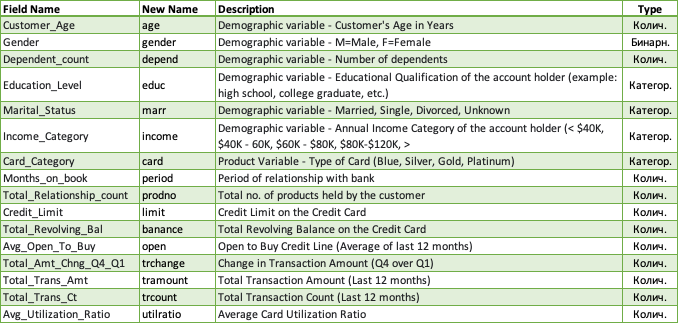

In [596]:
# dict = {'Yes': 1, 'No': 0}
# df = df.replace({'graduation': dict})


In [597]:
# df = pd.get_dummies(df.loc[:, field_names.keys()])
# df.info()


## 3. Построение доверительных интервалов

Для набора данных `BankChurners` рассмотрим линейную регрессию **limit** на **age, gender, balance, educ, card**.

In [598]:
# Создаем спецификацию модели через формулу
formula = (
    f'trcount ~ '
    f'age + '
    f'gender + '
    f'balance + '
    f'educ + '
    f'card'
)
model = smf.ols(formula=formula, data=df).fit()


In [599]:
df_table = pd.read_html(model.summary().tables[1].as_html(), header=0, index_col=0)[0]
df_table

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,73.0608,1.553,47.045,0.000,70.017,76.105
gender[T.M],-3.8552,0.462,-8.343,0.000,-4.761,-2.949
educ[T.Doctorate],-1.0293,1.309,-0.786,0.432,-3.595,1.536
educ[T.Graduate],-0.1630,0.836,-0.195,0.845,-1.801,1.475
educ[T.High School],-0.1721,0.890,-0.193,0.847,-1.917,1.573
educ[T.Post-Graduate],-0.2172,1.250,-0.174,0.862,-2.668,2.233
educ[T.Uneducated],0.4268,0.942,0.453,0.650,-1.419,2.273
educ[T.Unknown],-0.1856,0.937,-0.198,0.843,-2.023,1.652
card[T.Gold],17.8536,2.162,8.259,0.000,13.616,22.091
card[T.Platinum],23.3798,5.175,4.518,0.000,13.236,33.524


Построим 90%-доверительные интервалы для каждого коэффициента
alpha = 10%

In [600]:
alpha = 0.1 # Уровень значимости 10%


#### Способ 1 (используя функцию модели)

In [601]:
model.conf_int(alpha=0.05)

,0,1
Intercept,70.016674,76.105005
gender[T.M],-4.761011,-2.949425
educ[T.Doctorate],-3.595053,1.536484
educ[T.Graduate],-1.800785,1.474811
educ[T.High School],-1.917399,1.573251
educ[T.Post-Graduate],-2.667986,2.233498
educ[T.Uneducated],-1.418956,2.272536
educ[T.Unknown],-2.023282,1.652086
card[T.Gold],13.616053,22.091217
card[T.Platinum],13.235715,33.523926


#### Способ 2 (используя рассчеты по параметрам модели)

In [602]:
nobs = model.nobs
regr_cnt = model.df_model + 1
print(f'Количество наблюдений = {nobs:.0f}')
print(f'Количество регрессоров + 1 = {regr_cnt:.0f}')
# 5%-критическое значение t-распределения
t_cr = stats.t.ppf(1-alpha/2, nobs - regr_cnt)
print(f'Уровень значимости alpha = {alpha:.2f}')
print(f'Критическое значение t_cr = {t_cr:.3f}')


Количество наблюдений = 10127
Количество регрессоров + 1 = 13
Уровень значимости alpha = 0.10
Критическое значение t_cr = 1.645


In [603]:
df_table['lower'] = (df_table['coef'].astype(float) - df_table['std err'].astype(float)*t_cr).round(2)
df_table['upper'] = (df_table['coef'].astype(float) + df_table['std err'].astype(float)*t_cr).round(2)
df_table

,coef,std err,t,P>|t|,[0.025,0.975],lower,upper
Intercept,73.0608,1.553,47.045,0.000,70.017,76.105,70.51,75.62
gender[T.M],-3.8552,0.462,-8.343,0.000,-4.761,-2.949,-4.62,-3.10
educ[T.Doctorate],-1.0293,1.309,-0.786,0.432,-3.595,1.536,-3.18,1.12
educ[T.Graduate],-0.1630,0.836,-0.195,0.845,-1.801,1.475,-1.54,1.21
educ[T.High School],-0.1721,0.890,-0.193,0.847,-1.917,1.573,-1.64,1.29
educ[T.Post-Graduate],-0.2172,1.250,-0.174,0.862,-2.668,2.233,-2.27,1.84
educ[T.Uneducated],0.4268,0.942,0.453,0.650,-1.419,2.273,-1.12,1.98
educ[T.Unknown],-0.1856,0.937,-0.198,0.843,-2.023,1.652,-1.73,1.36
card[T.Gold],17.8536,2.162,8.259,0.000,13.616,22.091,14.30,21.41
card[T.Platinum],23.3798,5.175,4.518,0.000,13.236,33.524,14.87,31.89


## 4. Прогнозирование

In [604]:
# выбираем три случайных записи из датасета
df_ppl = df1.sample(n=3)
# ppl = random.choice(df)
df_ppl


,trcount,age,balance,gender_F,gender_M,educ_College,educ_Doctorate,educ_Graduate,educ_High_School,educ_Post_Graduate,educ_Uneducated,educ_Unknown,card_Blue,card_Gold,card_Platinum,card_Silver
765,47,45,1884,True,False,False,False,False,True,False,False,False,True,False,False,False
1008,46,39,1357,True,False,False,False,True,False,False,False,False,True,False,False,False
7732,70,53,1003,True,False,False,False,True,False,False,False,False,True,False,False,False


In [605]:
# df_ppl = pd.get_dummies(df_ppl.loc[:, field_names.keys()])
# df_ppl = pd.get_dummies(df.loc[:,['age','gender','balance','educ', 'card']])
# f'age + '
#     f'gender + '
#     f'balance + '
#     f'educ + '
#     f'card'
# df_ppl.info()


In [606]:
# Создаем спецификацию модели через формулу
formula = (
    f'trcount ~ '
    f'age + '
    f'gender_F + gender_M + '
    f'balance + '
    f'educ_College + educ_Doctorate + educ_High_School + educ_Post_Graduate + educ_Uneducated + educ_Unknown + '
    f'card_Blue + card_Gold + card_Platinum + card_Silver'
)
model1 = smf.ols(formula=formula, data=df1).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                trcount   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     28.00
Date:                Tue, 09 May 2023   Prob (F-statistic):           1.65e-63
Time:                        19:23:55   Log-Likelihood:                -46163.
No. Observations:               10127   AIC:                         9.235e+04
Df Residuals:                   10114   BIC:                         9.245e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     48.0278      1.143     42.034      0.000      45.788      50.268
gender_F[T.True]              25.9415      0.621     41.781      0.000      24.724      27.159
gender_M[T.True]              22.0863      0.612     36.114      0.000      20.887      23.285
educ_College[T.True]           0.1630      0.836      0.195      0.845      -1.475       1.801
educ_Doctorate[T.True]        -0.8663      1.164     -0.744      0.457      -3.149       1.416
educ_High_School[T.True]      -0.0091      0.661     -0.014      0.989      -1.304       1.286
educ_Post_Graduate[T.True]    -0.0543      1.098     -0.049      0.961      -2.207       2.099
educ_Uneducated[T.True]        0.5898      0.728      0.810      0.418      -0.837       2.017
educ_Unknown[T.True]          -0.0226      0.723     -0.031      0.975      -1.439       1.394
card_Blue[T.True]             -1.0715      1.249     -0.858      0.391      -3.520       1.378
card_Gold[T.True]             16.7822      2.039      8.231      0.000      12.786      20.779
card_Platinum[T.True]         22.3084      4.100      5.441      0.000      14.272      30.345
card_Silver[T.True]           10.0087      1.438      6.958      0.000       7.189      12.828
age                           -0.1944      0.029     -6.781      0.000      -0.251      -0.138
balance                        0.0016      0.000      5.700      0.000       0.001       0.002
==============================================================================
Omnibus:                      110.608   Durbin-Watson:                   0.933
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               85.303
Skew:                           0.139   Prob(JB):                     3.00e-19
Kurtosis:                       2.647   Cond. No.                     6.19e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.33e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [607]:
res = model1.predict(exog=df_ppl, transform=True)
# model1.predict(exog=df_ppl, transform=True)

In [608]:
# df_res = pd.DataFrame(res.round(2), index=[1,2,3], columns=['Прогноз'])
df_res = pd.DataFrame(res.round(2), columns=['Прогноз'])
df_res.reset_index(drop=True , inplace=True)
df_res.index += 1
df_res

,Прогноз
1,67.17
2,67.50
3,64.21


## 5. Мультиколлинеарность

In [609]:
df['gender'] = df.apply(lambda x: 1 if x['gender'] == 'M' else 0, axis=1)
df

,age,gender,depend,educ,marr,income,card,period,prodno,limit,balance,open,trchange,tramount,trcount,utilratio
0,45,1,3,High School,Married,$60K - $80K,Blue,39,5,12691.0,777,11914.0,1.335,1144,42,0.061
1,49,0,5,Graduate,Single,Less than $40K,Blue,44,6,8256.0,864,7392.0,1.541,1291,33,0.105
2,51,1,3,Graduate,Married,$80K - $120K,Blue,36,4,3418.0,0,3418.0,2.594,1887,20,0.000
3,40,0,4,High School,Unknown,Less than $40K,Blue,34,3,3313.0,2517,796.0,1.405,1171,20,0.760
4,40,1,3,Uneducated,Married,$60K - $80K,Blue,21,5,4716.0,0,4716.0,2.175,816,28,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,50,1,2,Graduate,Single,$40K - $60K,Blue,40,3,4003.0,1851,2152.0,0.703,15476,117,0.462
10123,41,1,2,Unknown,Divorced,$40K - $60K,Blue,25,4,4277.0,2186,2091.0,0.804,8764,69,0.511
10124,44,0,1,High School,Married,Less than $40K,Blue,36,5,5409.0,0,5409.0,0.819,10291,60,0.000
10125,30,1,2,Graduate,Unknown,$40K - $60K,Blue,36,4,5281.0,0,5281.0,0.535,8395,62,0.000


Рассмотрим линейную регрессию

**trcount на age, gender, balance, open, tramount**.

Для вычисления показателей VIF для коэффициентов
**age, tramount, gender** будем рассматривать следующие регрессии:

- **age на gender, balance, open, tramount**
- **tramount на age, gender, balance, open**
- **gender на age, balance, open, tramount**

In [610]:
# Создаем спецификацию модели через формулу
formula = (
    f'trcount ~ '
    f'age + '
    f'gender + '
    f'balance + '
    f'open + '
    f'tramount'
)
model = smf.ols(formula=formula, data=df).fit()


In [611]:
# Создаем спецификацию модели через формулу
formula = (
    f'age ~ '
    f'gender + '
    f'balance + '
    f'open + '
    f'tramount'
)
model1 = smf.ols(formula=formula, data=df).fit()


In [612]:
# Создаем спецификацию модели через формулу
formula = (
    f'tramount ~ '
    f'age + '
    f'gender + '
    f'balance + '
    f'open'
)
model2 = smf.ols(formula=formula, data=df).fit()


In [613]:
# Создаем спецификацию модели через формулу
formula = (
    f'gender ~ '
    f'age + '
    f'balance + '
    f'open + '
    f'tramount'
)
model3 = smf.ols(formula=formula, data=df).fit()


In [614]:
print(summary_col([model1, model2, model3], stars=True, float_format='%.3f'))


                  age      tramount    gender 
----------------------------------------------
Intercept      46.679*** 4641.991*** 0.350*** 
               (0.185)   (202.687)   (0.028)  
R-squared      0.003     0.038       0.180    
R-squared Adj. 0.003     0.038       0.180    
age                      -20.689***  -0.001** 
                         (4.133)     (0.001)  
balance        0.000**   0.317***    0.000*** 
               (0.000)   (0.041)     (0.000)  
gender         -0.409**  -404.902***          
               (0.176)   (73.160)             
open           0.000*    0.073***    0.000*** 
               (0.000)   (0.004)     (0.000)  
tramount       -0.000***             -0.000***
               (0.000)               (0.000)  
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


In [615]:
# names of exog
model.model.exog_names

['Intercept', 'age', 'gender', 'balance', 'open', 'tramount']

In [616]:
# VIF для totwrk/100 c округлением до 2-х десятичных знаков
VIF_1 = variance_inflation_factor(exog = model.model.exog, exog_idx = 1)
print('VIF for exog', model.model.exog_names[1], ': ', VIF_1.round(2))

VIF for exog age :  1.0


In [617]:
# VIF для totwrk/100 c округлением до 2-х десятичных знаков
VIF_2 = 1/(1 - model2.rsquared)
VIF_2.round(2)

1.04

In [618]:
# VIF для totwrk/100 c округлением до 2-х десятичных знаков
VIF_3 = 1/(1 - model3.rsquared)
VIF_3.round(2)

1.22

In [619]:
# VIF для totwrk/100 c округлением до 2-х десятичных знаков
VIF_2 = variance_inflation_factor(exog = model.model.exog, exog_idx = 5)
print('VIF for exog', model.model.exog_names[5], ': ', VIF_2.round(2))

VIF for exog tramount :  1.04


In [620]:
# VIF для totwrk/100 c округлением до 2-х десятичных знаков
VIF_3 = variance_inflation_factor(exog = model.model.exog, exog_idx = 2)
print('VIF for exog', model.model.exog_names[2], ': ', VIF_3.round(2))

VIF for exog gender :  1.22


Рассмотрим линейную регрессию
**trcount на age, gender, balance, open, tramount**.


In [622]:
alpha = 0.05 # Задаем уровень значимости
df2 = summary_params(model, alpha=alpha)
df2['significance'] = df2.apply(lambda x: 'Значим' if x['P>|t|']<alpha else 'Незначим', axis=1)
df2

,Coef.,Std.Err.,t,P>|t|,[0.005,0.995],significance
Intercept,46.407625,0.852541,54.434462,0.000000e+00,44.211210,48.604040,Значим
age,-0.089829,0.016970,-5.293501,1.225089e-07,-0.133548,-0.046110,Значим
gender,-3.517449,0.300501,-11.705282,1.909008e-31,-4.291634,-2.743264,Значим
balance,0.000141,0.000168,0.840190,4.008216e-01,-0.000291,0.000573,Незначим
open,-0.000084,0.000017,-4.998292,5.880879e-07,-0.000127,-0.000041,Значим
tramount,0.005615,0.000041,137.749644,0.000000e+00,0.005510,0.005720,Значим


In [623]:
#VIFs
VIFS = pd.DataFrame({'VIF': [variance_inflation_factor(model.model.exog, i) for i in range(int(model.df_model+1))]}, index=model.model.exog_names)
VIFS.drop(index='Intercept', inplace=True)
VIFS

,VIF
age,1.003117
gender,1.219574
balance,1.011470
open,1.256451
tramount,1.039439
